In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-colorblind')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os
print(os.listdir("../input"))

['mental-health-datasat', 'playground-series-s4e11']


In [3]:
df_train = pd.read_csv('../input/playground-series-s4e11/train.csv')
df_test = pd.read_csv('../input/playground-series-s4e11/test.csv')

In [4]:
df_train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [5]:
print(df_train.columns)

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [6]:
df_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
df_train.shape

(140700, 20)

In [8]:
df_test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [9]:
for col in df_train.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(wsg)

column:         id	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:       City	 Percent of NaN value: 0.00%
column: Working Professional or Student	 Percent of NaN value: 0.00%
column: Profession	 Percent of NaN value: 26.03%
column: Academic Pressure	 Percent of NaN value: 80.17%
column: Work Pressure	 Percent of NaN value: 19.84%
column:       CGPA	 Percent of NaN value: 80.17%
column: Study Satisfaction	 Percent of NaN value: 80.17%
column: Job Satisfaction	 Percent of NaN value: 19.84%
column: Sleep Duration	 Percent of NaN value: 0.00%
column: Dietary Habits	 Percent of NaN value: 0.00%
column:     Degree	 Percent of NaN value: 0.00%
column: Have you ever had suicidal thoughts ?	 Percent of NaN value: 0.00%
column: Work/Study Hours	 Percent of NaN value: 0.00%
column: Financial Stress	 Percent of NaN value: 0.00%
column: Family History of Mental Illne

In [10]:
for col in df_test.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(wsg)

column:         id	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:       City	 Percent of NaN value: 0.00%
column: Working Professional or Student	 Percent of NaN value: 0.00%
column: Profession	 Percent of NaN value: 26.26%
column: Academic Pressure	 Percent of NaN value: 79.99%
column: Work Pressure	 Percent of NaN value: 20.02%
column:       CGPA	 Percent of NaN value: 79.99%
column: Study Satisfaction	 Percent of NaN value: 79.99%
column: Job Satisfaction	 Percent of NaN value: 20.01%
column: Sleep Duration	 Percent of NaN value: 0.00%
column: Dietary Habits	 Percent of NaN value: 0.01%
column:     Degree	 Percent of NaN value: 0.00%
column: Have you ever had suicidal thoughts ?	 Percent of NaN value: 0.00%
column: Work/Study Hours	 Percent of NaN value: 0.00%
column: Financial Stress	 Percent of NaN value: 0.00%
column: Family History of Mental Illne

<Axes: >

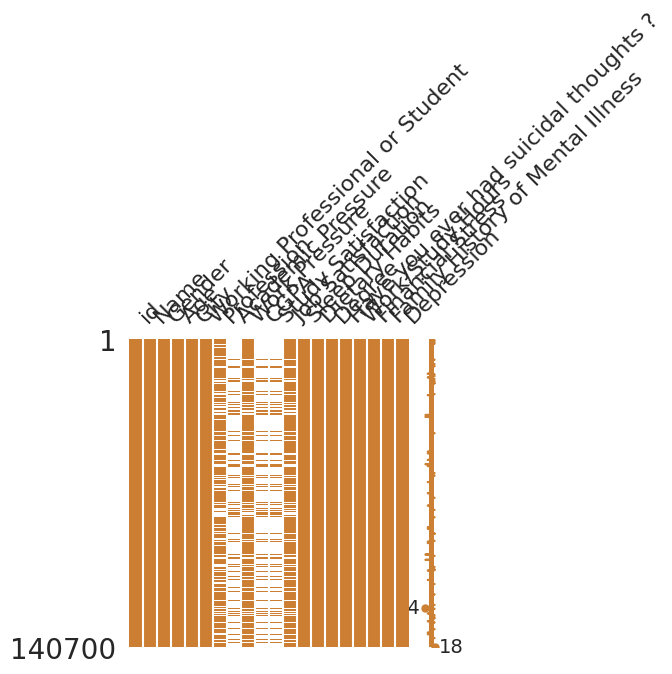

In [11]:
msno.matrix(df = df_train.iloc[:,:], figsize = (4, 4), color = (0.8, 0.5, 0.2))

<Axes: >

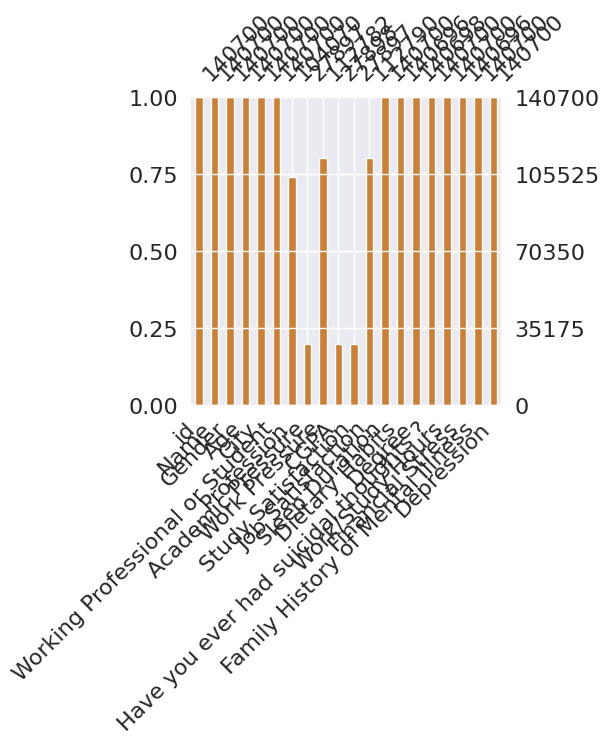

In [12]:
msno.bar(df = df_train.iloc[:,:], figsize = (4, 4), color = (0.8, 0.5, 0.2))

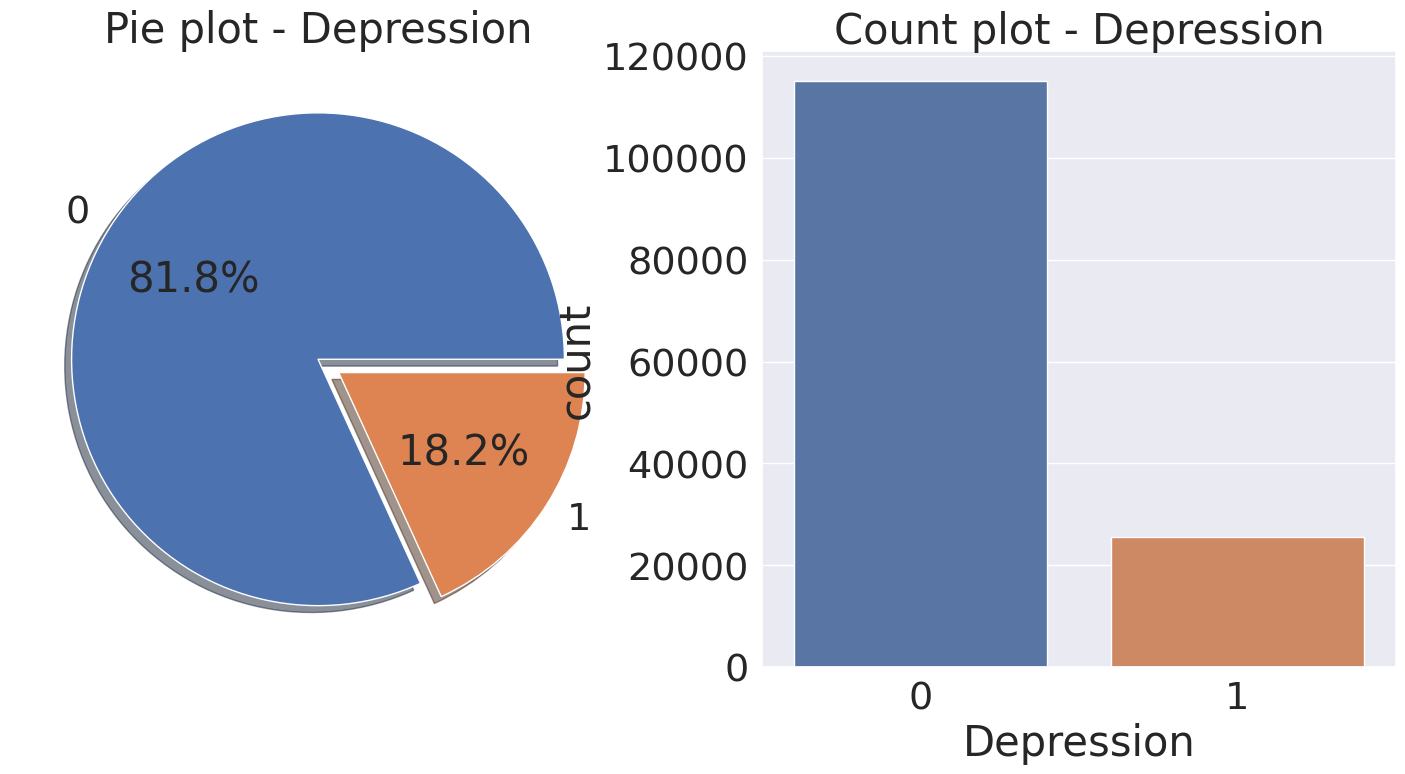

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Depression'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title("Pie plot - Depression")
ax[0].set_ylabel('')
sns.countplot(x='Depression', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Depression')
plt.show()

**Gender**

In [14]:
df_train[['Gender', 'Depression']].groupby(['Gender'], as_index = True).count()

,Depression
Gender,
Female,63236
Male,77464


In [15]:
df_train[['Gender', 'Depression']].groupby(['Gender'], as_index = True).mean()

,Depression
Gender,
Female,0.178237
Male,0.184550


In [16]:
df_train[['Gender', 'Depression']].groupby(['Gender']).sum()

,Depression
Gender,
Female,11271
Male,14296


<Axes: xlabel='Gender'>

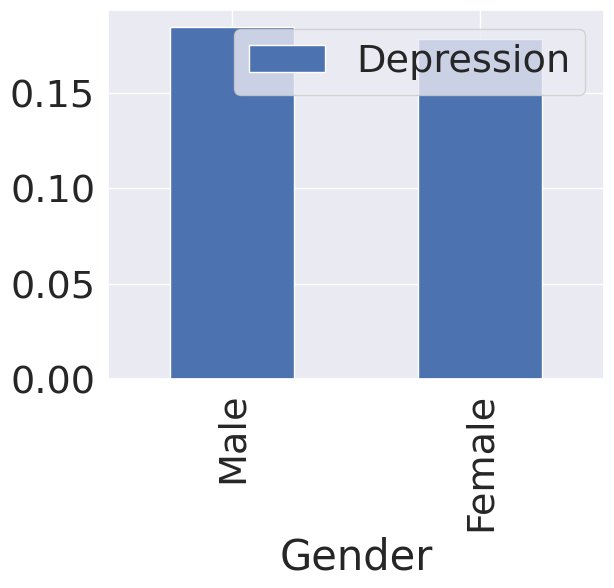

In [17]:
df_train[['Gender','Depression']].groupby(['Gender'], as_index = True).mean().sort_values(by = 'Gender', ascending = False).plot.bar()

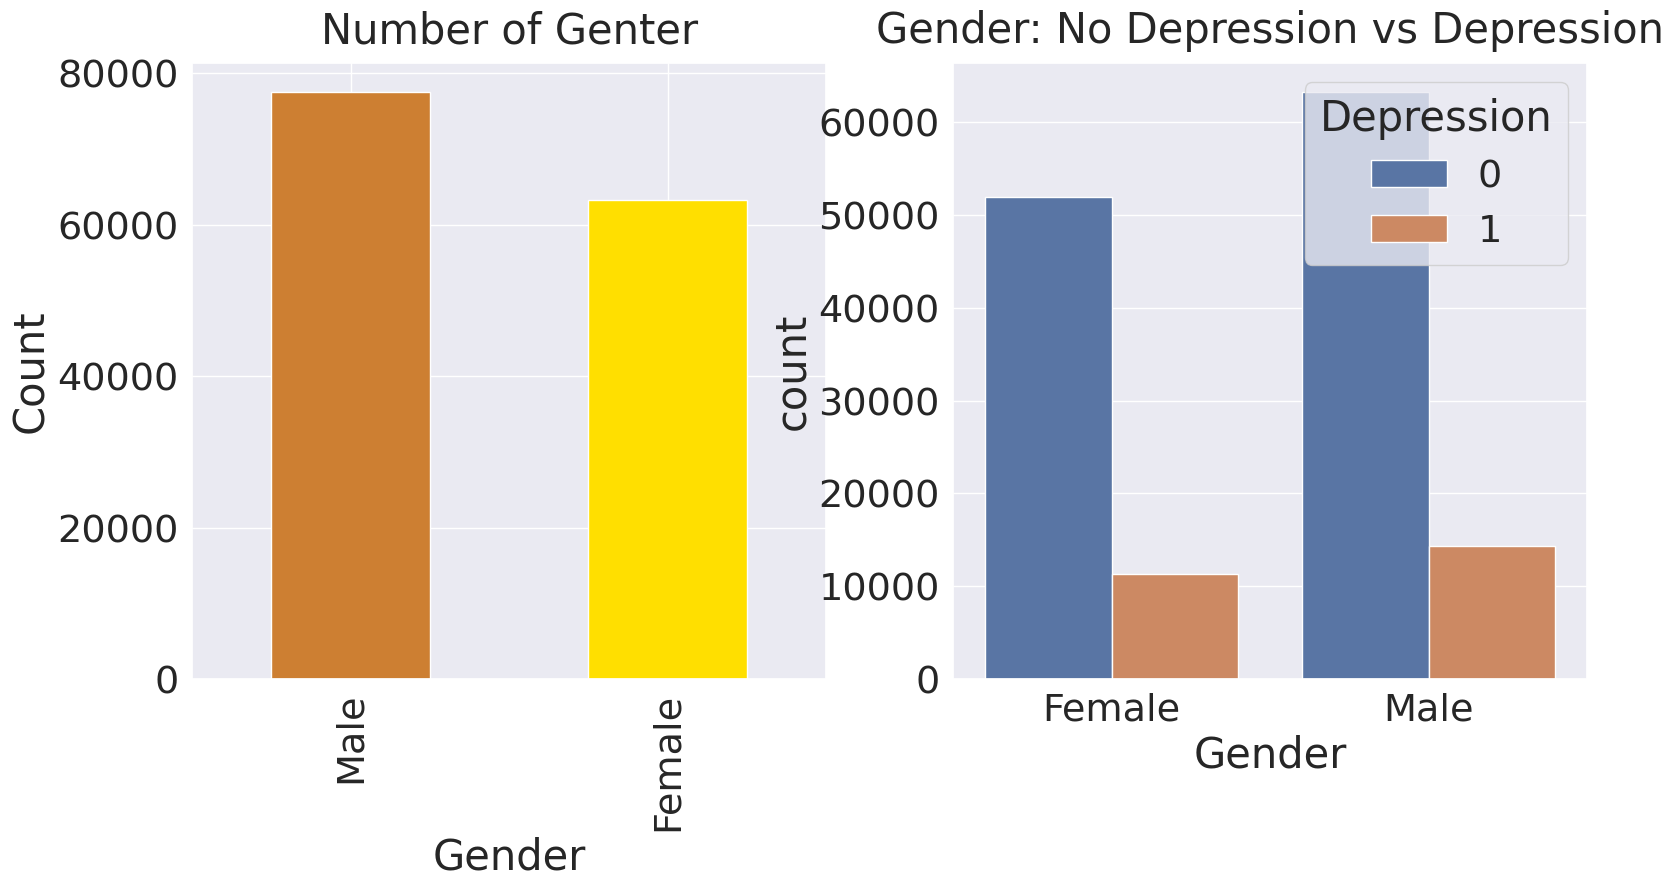

In [18]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Gender'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00'], ax = ax[0])
ax[0].set_title('Number of Genter', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Gender', hue = 'Depression', data = df_train, ax = ax[1])
ax[1].set_title("Gender: No Depression vs Depression", y = y_position)

plt.show()

In [19]:
pd.crosstab(df_train['Gender'], df_train['Depression'], margins = True).style.background_gradient(cmap = 'summer_r')

Depression,0,1,All
Gender,,,
Female,51965,11271,63236
Male,63168,14296,77464
All,115133,25567,140700


In [20]:
df_train.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


**Age**

In [21]:
print('제일 나이 많은 사람 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 적은 사람 : {:.1f} Years'.format(df_train['Age'].min()))
print('평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 사람 : 60.0 Years
제일 나이 적은 사람 : 18.0 Years
평균 나이 : 40.4 Years


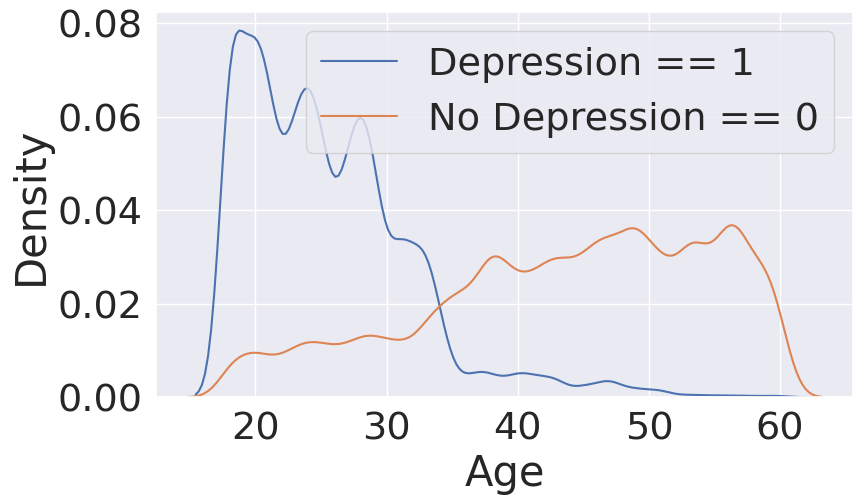

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Depression'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Depression'] == 0]['Age'], ax = ax)
plt.legend(['Depression == 1', 'No Depression == 0'])

plt.show()

<Axes: >

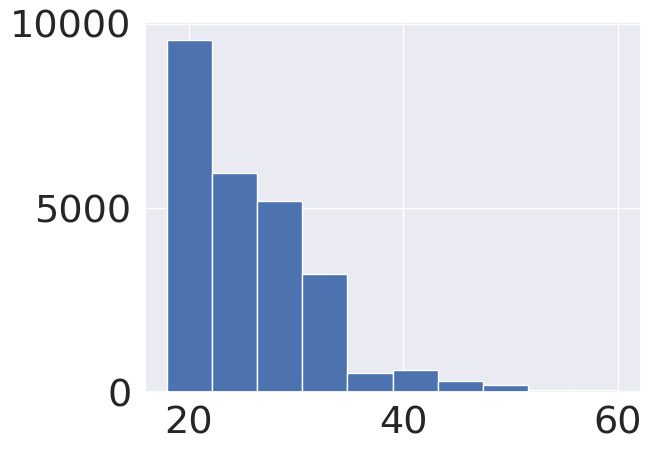

In [23]:
df_train[df_train['Depression'] == 1]['Age'].hist()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

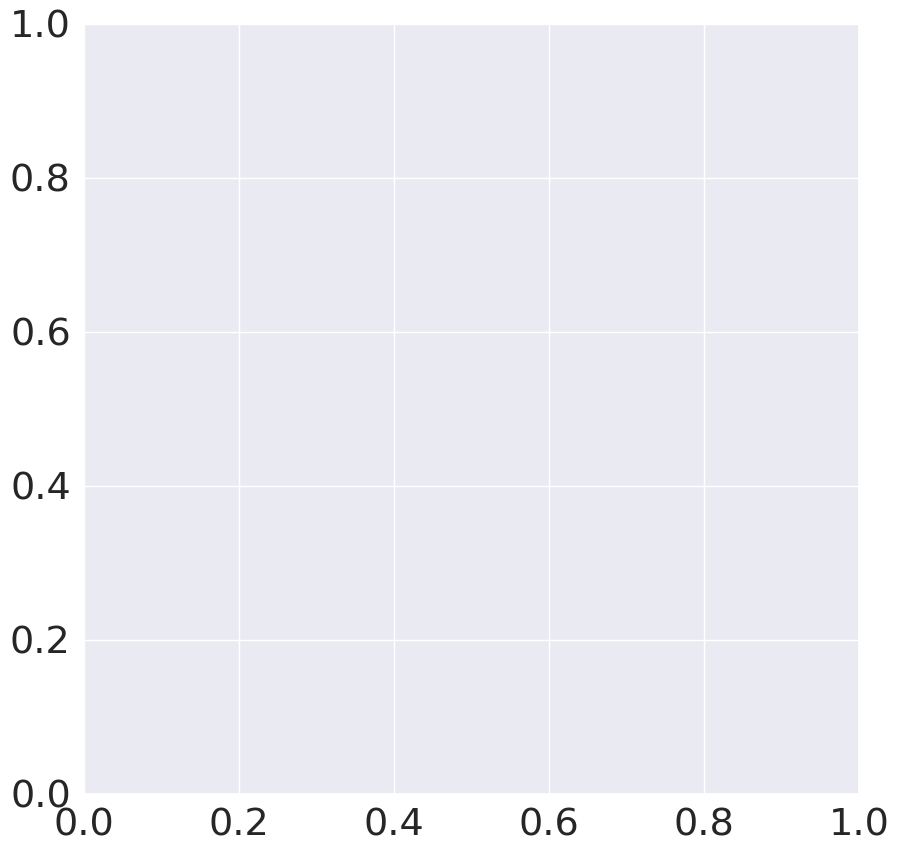

<Figure size 1000x1000 with 0 Axes>

In [24]:
f = plt.figure(figsize = (10, 10))

f, ax = plt.subplots(1, 1, figsize = (10, 10))

plt.figure(figsize = (10, 10))

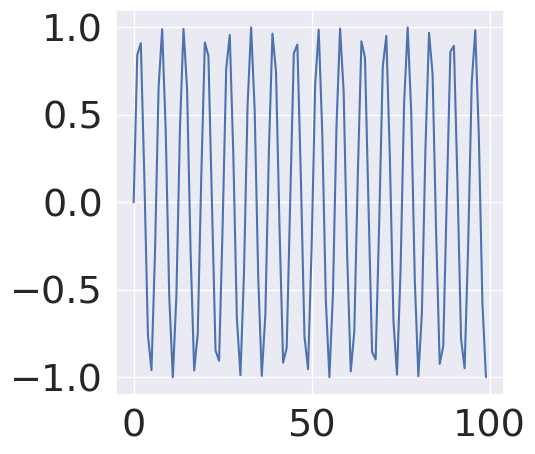

In [25]:
f, ax = plt.subplots(1, 1, figsize = (5, 5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

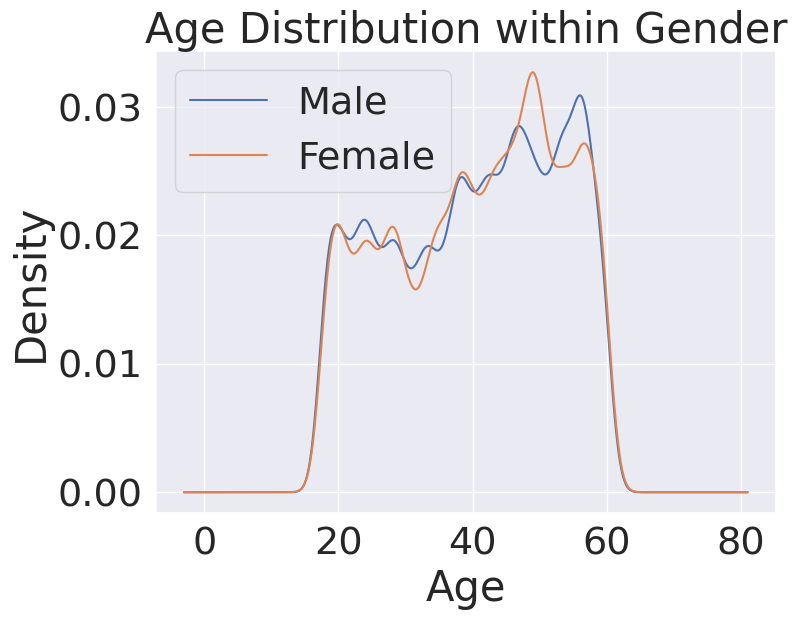

In [26]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Gender'] == 'Male'].plot(kind = 'kde')
df_train['Age'][df_train['Gender'] == 'Female'].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within Gender')
plt.legend(['Male', 'Female'])

In [27]:
df_train['Age'].min()

18.0

In [28]:
df_train['Age'].max()

60.0

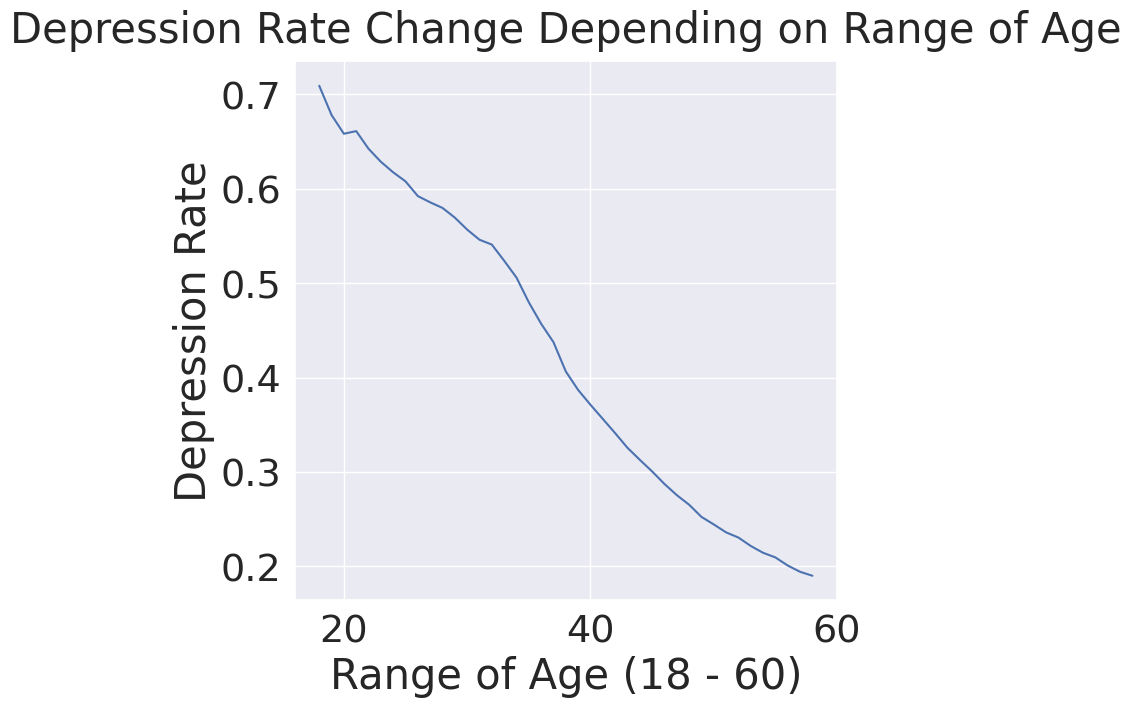

In [29]:
change_age_range_depression_ratio = []

for i in range (1, 60):
    change_age_range_depression_ratio.append(df_train[df_train['Age'] < i]['Depression'].sum() / len(df_train[df_train['Age'] < i]['Depression']))

plt.figure(figsize = (7, 7))
plt.plot(change_age_range_depression_ratio)
plt.title("Depression Rate Change Depending on Range of Age", y = 1.02)
plt.ylabel('Depression Rate')
plt.xlabel('Range of Age (18 - 60)')
plt.show()

In [30]:
i = 35
df_train[df_train['Age'] < i]['Depression'].sum() / len(df_train[df_train['Age'] < i]['Depression'])

0.5059858035808878

**Working Professional or Student**

In [31]:
df_train[['Working Professional or Student', 'Depression']].groupby(['Working Professional or Student'], as_index = True).count()

,Depression
Working Professional or Student,
Student,27901
Working Professional,112799


In [32]:
df_train[['Working Professional or Student', 'Depression']].groupby(['Working Professional or Student']).sum()

,Depression
Working Professional or Student,
Student,16336
Working Professional,9231


In [33]:
df_train['Working Professional or Student'].isnull().sum()

0

<Axes: xlabel='Working Professional or Student'>

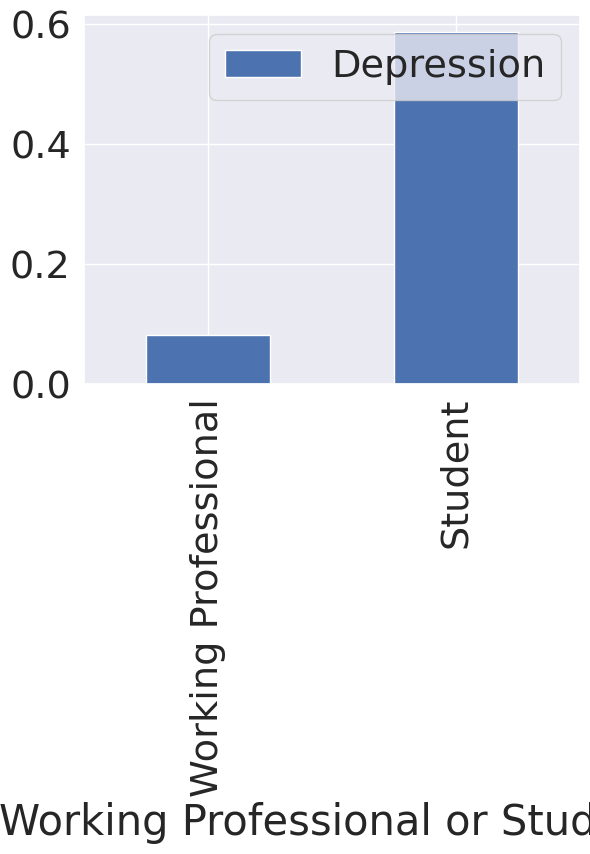

In [34]:
df_train[['Working Professional or Student','Depression']].groupby(['Working Professional or Student'], as_index = True).mean().sort_values(by = 'Working Professional or Student', ascending = False).plot.bar()

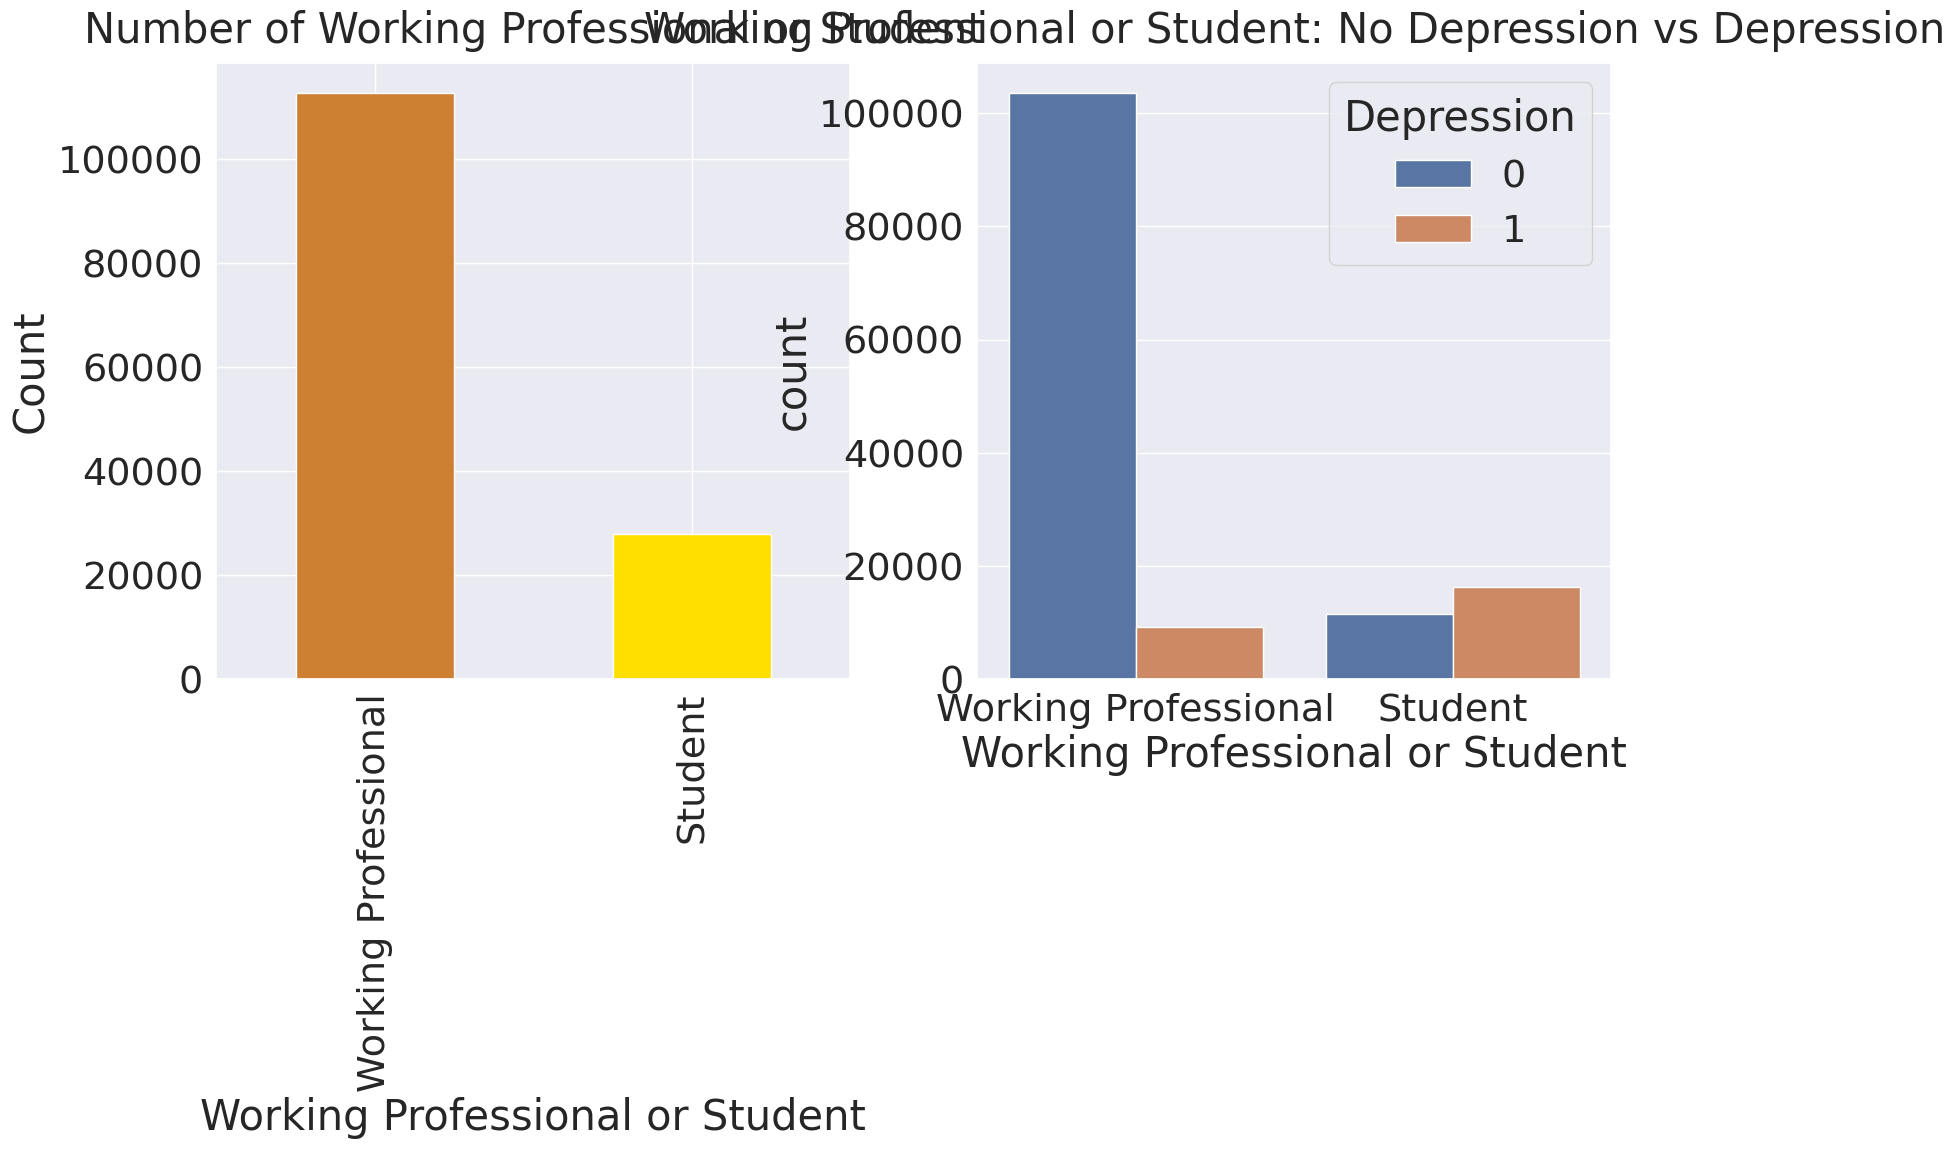

In [35]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Working Professional or Student'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00'], ax = ax[0])
ax[0].set_title('Number of Working Professional or Student', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Working Professional or Student', hue = 'Depression', data = df_train, ax = ax[1])
ax[1].set_title("Working Professional or Student: No Depression vs Depression", y = y_position)

plt.show()

**Wait a Minute...**

In [36]:
df_train.head(100)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Shiv,Male,36.0,Rajkot,Working Professional,Teacher,NaN,2.0,NaN,NaN,5.0,More than 8 hours,Healthy,B.Ed,Yes,10.0,4.0,No,0
96,96,Aarush,Male,31.0,Ludhiana,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Ed,Yes,4.0,2.0,No,0
97,97,Vibha,Female,52.0,Chennai,Working Professional,Data Scientist,NaN,1.0,NaN,NaN,3.0,7-8 hours,Moderate,M.Tech,No,1.0,2.0,Yes,0
98,98,Rupal,Female,56.0,Lucknow,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,2.0,Less than 5 hours,Healthy,B.Ed,No,9.0,2.0,No,0


In [37]:
df_train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [38]:
df_train['Have you ever had suicidal thoughts ?'].unique()

array(['No', 'Yes'], dtype=object)

**Have you ever had suicidal thoughts ?**

In [39]:
df_train.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)
df_test.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [40]:
df_train[['Suicidal Thoughts', 'Depression']].groupby(['Suicidal Thoughts'], as_index = True).count()

,Depression
Suicidal Thoughts,
No,71138
Yes,69562


In [41]:
df_train[['Suicidal Thoughts', 'Depression']].groupby(['Suicidal Thoughts']).sum()

,Depression
Suicidal Thoughts,
No,3458
Yes,22109


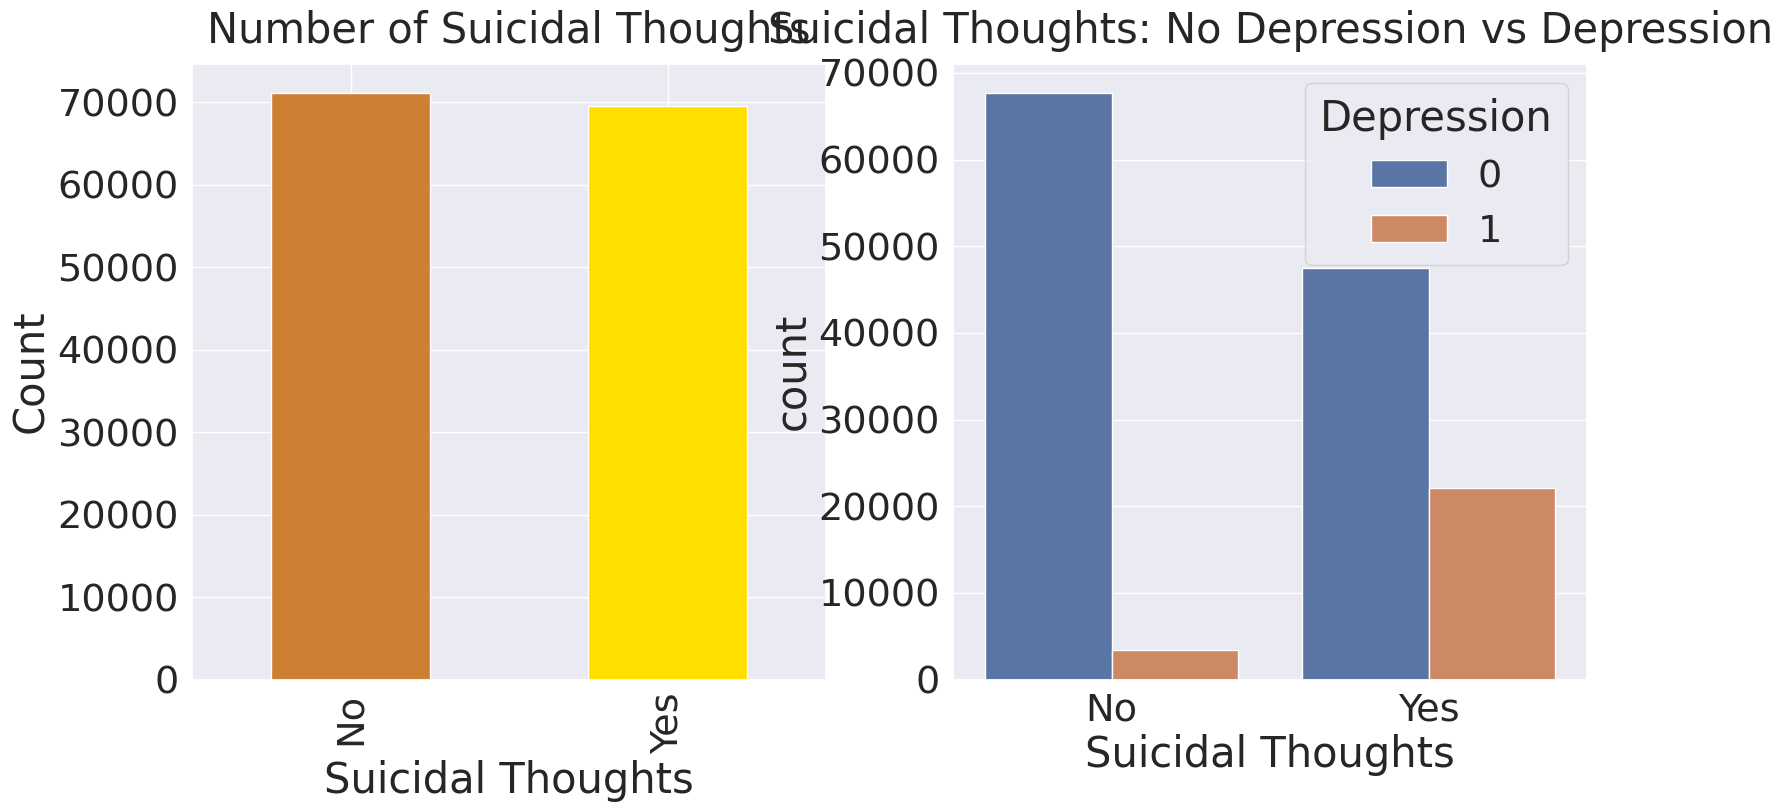

In [42]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Suicidal Thoughts'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00'], ax = ax[0])
ax[0].set_title('Number of Suicidal Thoughts', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Suicidal Thoughts', hue = 'Depression', data = df_train, ax = ax[1])
ax[1].set_title("Suicidal Thoughts: No Depression vs Depression", y = y_position)

plt.show()

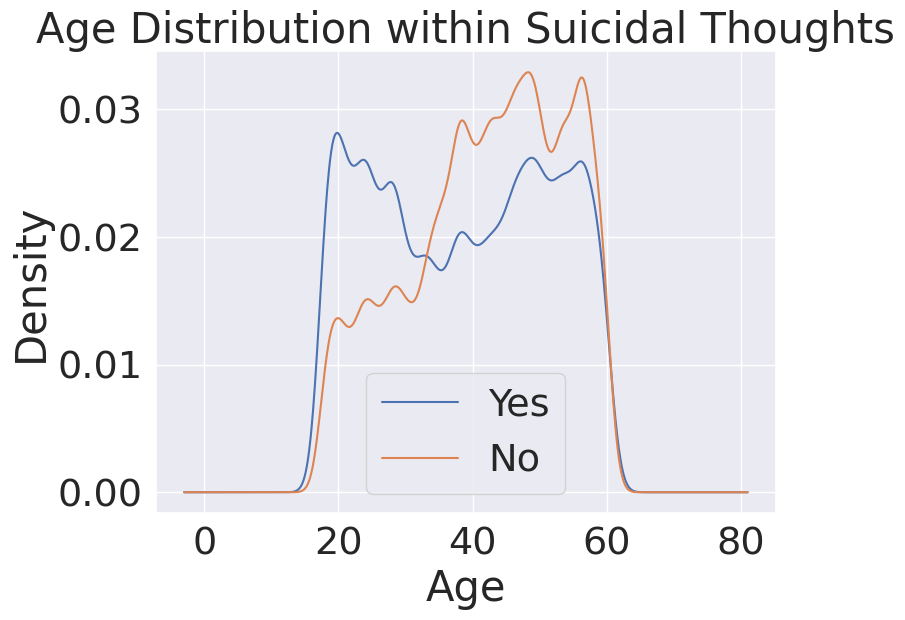

In [43]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Suicidal Thoughts'] == 'Yes'].plot(kind = 'kde')
df_train['Age'][df_train['Suicidal Thoughts'] == 'No'].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within Suicidal Thoughts')
plt.legend(['Yes', 'No'])

**Work/Study Hours**

In [44]:
df_train['Work/Study Hours'].unique()

array([ 1.,  7.,  3., 10.,  9.,  6.,  8.,  2.,  0.,  5., 12.,  4., 11.])

In [45]:
pd.crosstab(df_train['Work/Study Hours'], df_train['Depression'], margins = True).style.background_gradient(cmap = 'summer_r')

Depression,0,1,All
Work/Study Hours,,,
0.000000,11078,988,12066
1.000000,9033,769,9802
2.000000,9497,1098,10595
3.000000,8403,1071,9474
4.000000,7853,1212,9065
5.000000,8219,1118,9337
6.000000,8539,1893,10432
7.000000,7929,1943,9872
8.000000,6689,2217,8906


**Financial Stress**

In [46]:
df_train['Financial Stress'].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

<Axes: >

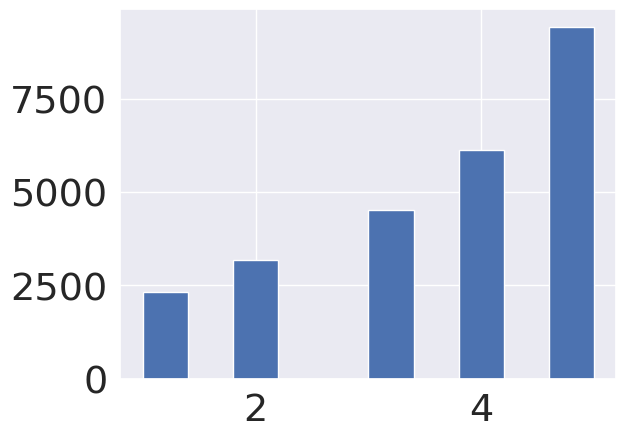

In [47]:
df_train[df_train['Depression'] == 1]['Financial Stress'].hist()

**Family History of Mental Illness**

In [48]:
df_train['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df_train[['Family History of Mental Illness', 'Depression']].groupby(['Family History of Mental Illness'], as_index = True).count()

,Depression
Family History of Mental Illness,
No,70758
Yes,69942


In [50]:
df_train[['Family History of Mental Illness', 'Depression']].groupby(['Family History of Mental Illness']).sum()

,Depression
Family History of Mental Illness,
No,12410
Yes,13157


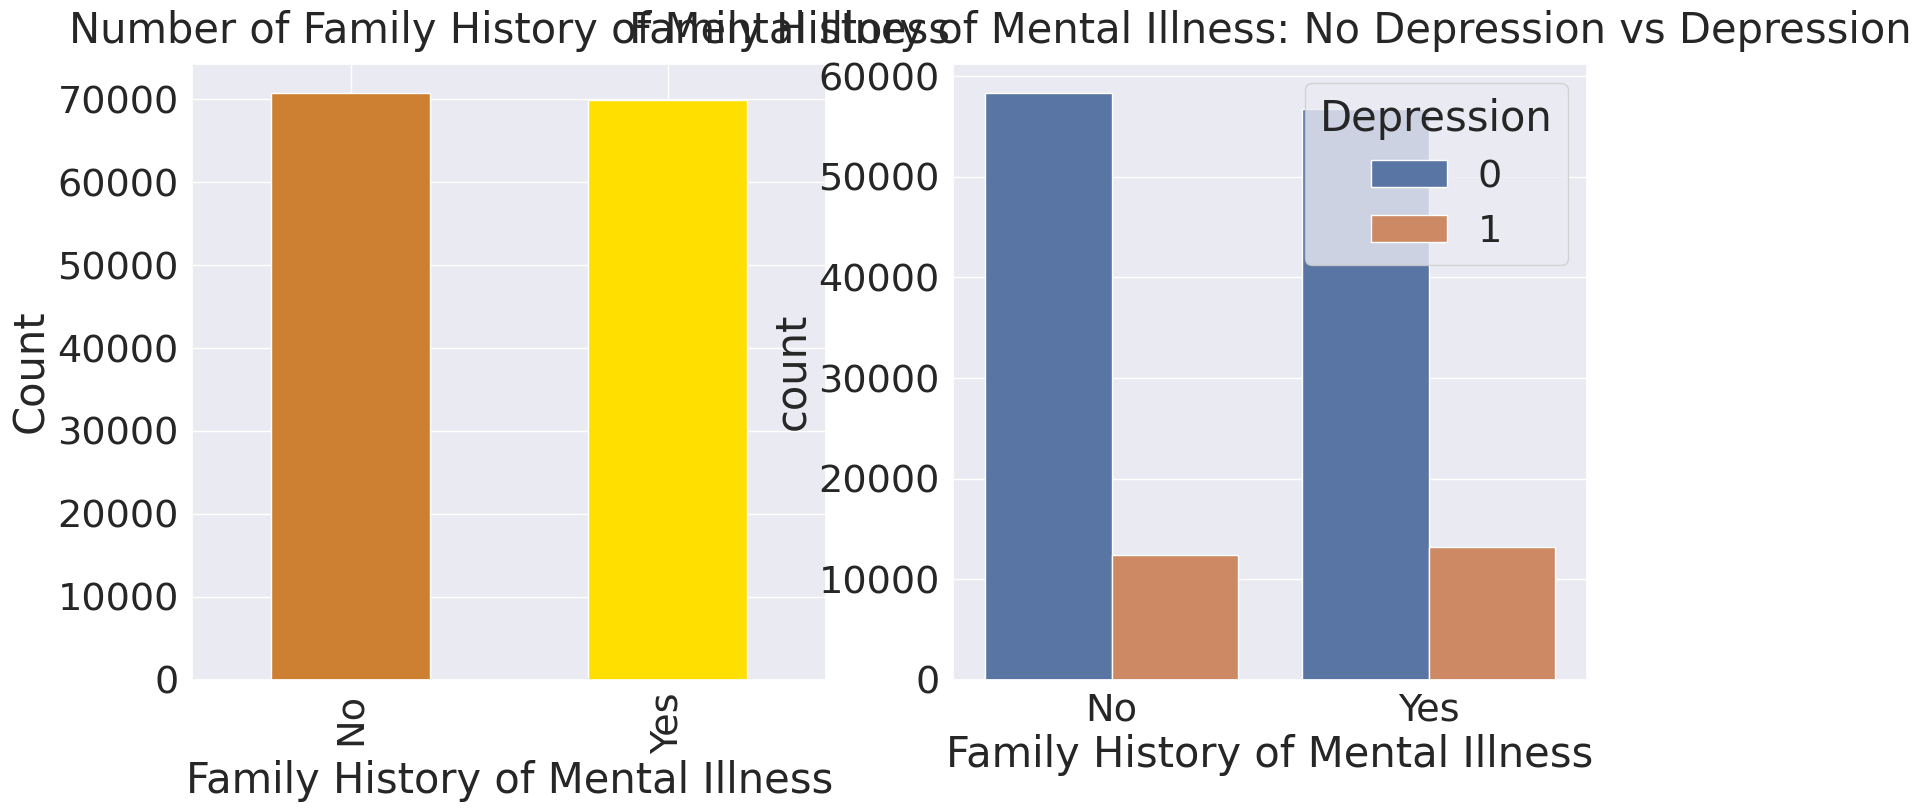

In [51]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Family History of Mental Illness'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00'], ax = ax[0])
ax[0].set_title('Number of Family History of Mental Illness', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Family History of Mental Illness', hue = 'Depression', data = df_train, ax = ax[1])
ax[1].set_title("Family History of Mental Illness: No Depression vs Depression", y = y_position)

plt.show()

**Feature engineering**

1) Social Work Pressure = Academic Pressure + Work Pressure

In [52]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [53]:
df_train['Social Work Pressure'] = df_train['Academic Pressure'].where(df_train['Academic Pressure'].notna(), df_train['Work Pressure'])
df_test['Social Work Pressure'] = df_test['Academic Pressure'].where(df_test['Academic Pressure'].notna(), df_test['Work Pressure'])

2) Social Work Satisfaction = Study Satisfaction + Job Satisfaction

In [54]:
df_train['Social Work Satisfaction'] = df_train['Study Satisfaction'].where(df_train['Study Satisfaction'].notna(), df_train['Job Satisfaction'])
df_test['Social Work Satisfaction'] = df_test['Study Satisfaction'].where(df_test['Study Satisfaction'].notna(), df_test['Job Satisfaction'])

In [55]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


3) Fill NULL

In [56]:
for col in df_train.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(wsg)

column:         id	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:       City	 Percent of NaN value: 0.00%
column: Working Professional or Student	 Percent of NaN value: 0.00%
column: Profession	 Percent of NaN value: 26.03%
column: Academic Pressure	 Percent of NaN value: 80.17%
column: Work Pressure	 Percent of NaN value: 19.84%
column:       CGPA	 Percent of NaN value: 80.17%
column: Study Satisfaction	 Percent of NaN value: 80.17%
column: Job Satisfaction	 Percent of NaN value: 19.84%
column: Sleep Duration	 Percent of NaN value: 0.00%
column: Dietary Habits	 Percent of NaN value: 0.00%
column:     Degree	 Percent of NaN value: 0.00%
column: Suicidal Thoughts	 Percent of NaN value: 0.00%
column: Work/Study Hours	 Percent of NaN value: 0.00%
column: Financial Stress	 Percent of NaN value: 0.00%
column: Family History of Mental Illness	 Percent of NaN v

In [57]:
df_train['Social Work Pressure'].isnull().sum()

21

In [58]:
df_train['Social Work Pressure'].mean()

3.027409919035535

In [59]:
df_train['Social Work Pressure'].fillna(3, inplace = True)

In [60]:
df_train['Social Work Pressure'].isnull().sum()

0

In [61]:
df_train['Social Work Satisfaction'].isnull().sum()

15

In [62]:
df_train['Social Work Satisfaction'].mean()

2.9685680776202155

In [63]:
df_train['Social Work Satisfaction'].fillna(3, inplace = True)

In [64]:
df_test['Social Work Pressure'].isnull().sum()

12

In [65]:
df_test['Social Work Pressure'].mean()

3.0411673135155883

In [66]:
df_test['Social Work Pressure'].fillna(3, inplace = True)

In [67]:
df_test['Social Work Satisfaction'].isnull().sum()

8

In [68]:
df_test['Social Work Satisfaction'].mean()

2.9566594165813713

In [69]:
df_test['Social Work Satisfaction'].fillna(3, inplace = True)

In [70]:
df_train['Financial Stress'].isnull().sum()

4

In [71]:
df_train['Financial Stress'].mean()

2.988983339967021

In [72]:
df_train['Financial Stress'].fillna(3, inplace = True)

In [73]:
df_test['Financial Stress'].isnull().sum()

0

In [74]:
df_train['Financial Stress'].isnull().sum()

0

In [75]:
for col in df_train.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(wsg)

column:         id	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:       City	 Percent of NaN value: 0.00%
column: Working Professional or Student	 Percent of NaN value: 0.00%
column: Profession	 Percent of NaN value: 26.03%
column: Academic Pressure	 Percent of NaN value: 80.17%
column: Work Pressure	 Percent of NaN value: 19.84%
column:       CGPA	 Percent of NaN value: 80.17%
column: Study Satisfaction	 Percent of NaN value: 80.17%
column: Job Satisfaction	 Percent of NaN value: 19.84%
column: Sleep Duration	 Percent of NaN value: 0.00%
column: Dietary Habits	 Percent of NaN value: 0.00%
column:     Degree	 Percent of NaN value: 0.00%
column: Suicidal Thoughts	 Percent of NaN value: 0.00%
column: Work/Study Hours	 Percent of NaN value: 0.00%
column: Financial Stress	 Percent of NaN value: 0.00%
column: Family History of Mental Illness	 Percent of NaN v

4) string to int

In [76]:
print(df_train.dtypes)

id                                    int64
Name                                 object
Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
Social Work Pressure                float64
Social Work Satisfaction            float64
dtype: object


In [77]:
df_train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [78]:
df_train['Gender'] = df_train['Gender'].map({'Female':0, 'Male':1})
df_test['Gender'] = df_test['Gender'].map({'Female':0, 'Male':1})

In [79]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction
0,0,Aaradhya,0,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,1,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,1,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0


In [80]:
df_train.rename(columns={'Working Professional or Student': 'Working Professional/Student'}, inplace=True)
df_test.rename(columns={'Working Professional or Student': 'Working Professional/Student'}, inplace=True)

In [81]:
df_train['Working Professional/Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [82]:
df_train['Working Professional/Student'] = df_train['Working Professional/Student'].map({'Working Professional':0, 'Student':1})
df_test['Working Professional/Student'] = df_test['Working Professional/Student'].map({'Working Professional':0, 'Student':1})

In [83]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,1,26.0,Varanasi,0,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0


In [84]:
df_train['Suicidal Thoughts'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
df_train['Suicidal Thoughts'] = df_train['Suicidal Thoughts'].map({'No':0, 'Yes':1})
df_test['Suicidal Thoughts'] = df_test['Suicidal Thoughts'].map({'No':0, 'Yes':1})

In [86]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,0,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,1,26.0,Varanasi,0,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,No,1,5.0,2.0


In [87]:
df_train['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].map({'No':0, 'Yes':1})
df_test['Family History of Mental Illness'] = df_test['Family History of Mental Illness'].map({'No':0, 'Yes':1})

In [89]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0,5.0,2.0
1,1,Vivan,1,26.0,Varanasi,0,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1,4.0,3.0
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1,5.0,2.0


4-1.Age_cat

In [90]:
df_train['Age_cat'] = 0
df_test['Age_cat'] = 0

In [91]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction,Age_cat
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,NaN,5.0,NaN,...,Healthy,BHM,0,1.0,2.0,0,0,5.0,2.0,0
1,1,Vivan,1,26.0,Varanasi,0,Teacher,NaN,4.0,NaN,...,Unhealthy,LLB,1,7.0,3.0,0,1,4.0,3.0,0
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,NaN,8.97,...,Healthy,B.Pharm,1,3.0,1.0,0,1,5.0,2.0,0


In [92]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [93]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [94]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction,Age_cat
0,0,Aaradhya,0,49.0,Ludhiana,0,Chef,NaN,5.0,NaN,...,Healthy,BHM,0,1.0,2.0,0,0,5.0,2.0,4
1,1,Vivan,1,26.0,Varanasi,0,Teacher,NaN,4.0,NaN,...,Unhealthy,LLB,1,7.0,3.0,0,1,4.0,3.0,2
2,2,Yuvraj,1,33.0,Visakhapatnam,1,NaN,5.0,NaN,8.97,...,Healthy,B.Pharm,1,3.0,1.0,0,1,5.0,2.0,3


In [95]:
print(df_train.columns)

Index(['id', 'Name', 'Gender', 'Age', 'City', 'Working Professional/Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Suicidal Thoughts', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Social Work Pressure', 'Social Work Satisfaction', 'Age_cat'],
      dtype='object')


In [96]:
df_train.drop(['id', 'Name', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree'], axis = 1, inplace = True)
df_test.drop(['id', 'Name', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree'], axis = 1, inplace = True)

In [97]:
df_train.head(3)

,Gender,Working Professional/Student,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Social Work Pressure,Social Work Satisfaction,Age_cat
0,0,0,0,1.0,2.0,0,0,5.0,2.0,4
1,1,0,1,7.0,3.0,0,1,4.0,3.0,2
2,1,1,1,3.0,1.0,0,1,5.0,2.0,3


In [98]:
for col in df_test.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(wsg)

column:     Gender	 Percent of NaN value: 0.00%
column: Working Professional/Student	 Percent of NaN value: 0.00%
column: Suicidal Thoughts	 Percent of NaN value: 0.00%
column: Work/Study Hours	 Percent of NaN value: 0.00%
column: Financial Stress	 Percent of NaN value: 0.00%
column: Family History of Mental Illness	 Percent of NaN value: 0.00%
column: Social Work Pressure	 Percent of NaN value: 0.00%
column: Social Work Satisfaction	 Percent of NaN value: 0.00%
column:    Age_cat	 Percent of NaN value: 0.00%


In [99]:
print(df_train['Gender'].isnull().sum())
print(df_train['Working Professional/Student'].isnull().sum())
print(df_train['Suicidal Thoughts'].isnull().sum())
print(df_train['Work/Study Hours'].isnull().sum())
print(df_train['Financial Stress'].isnull().sum())
print(df_train['Family History of Mental Illness'].isnull().sum())
print(df_train['Social Work Pressure'].isnull().sum())
print(df_train['Social Work Satisfaction'].isnull().sum())
print(df_train['Age_cat'].isnull().sum())

0
0
0
0
0
0
0
0
0


--------전처리 완료--------

In [100]:
print(df_train.columns)

Index(['Gender', 'Working Professional/Student', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression',
       'Social Work Pressure', 'Social Work Satisfaction', 'Age_cat'],
      dtype='object')


In [101]:
heatmap_data = df_train[['Gender', 'Working Professional/Student', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression',
       'Social Work Pressure', 'Social Work Satisfaction', 'Age_cat']]

<Axes: title={'center': 'Person Correalation of Features'}>

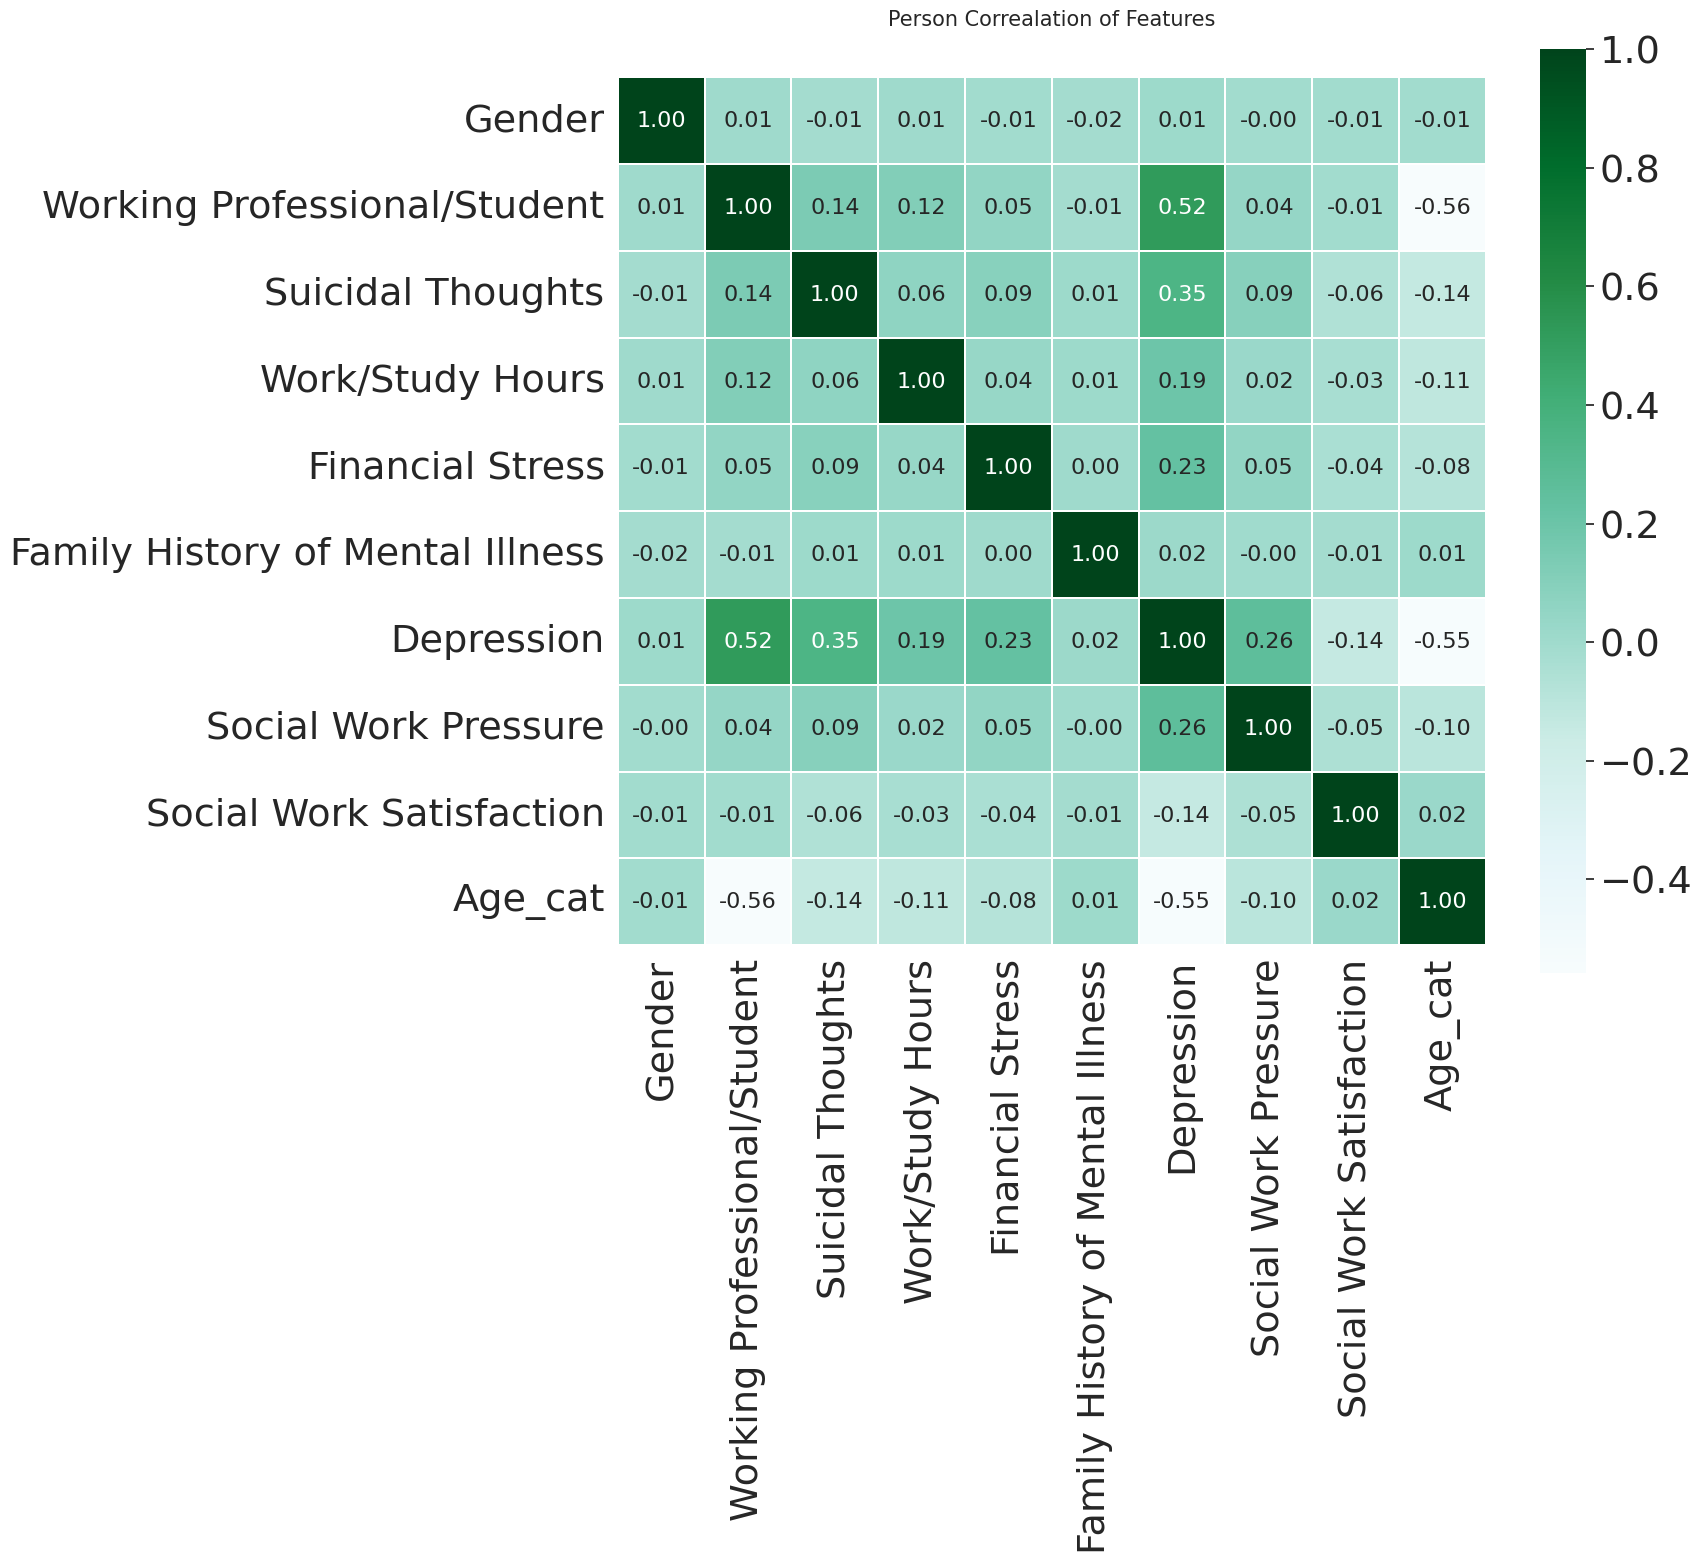

In [102]:
colormap = plt.cm.BuGn
plt.figure(figsize = (14, 12))
plt.title('Person Correalation of Features', y=1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 16}, fmt = '.2f')

**Model development - Machine Learning (Random Forest)**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [104]:
X_train = df_train.drop('Depression', axis = 1).values
target_label = df_train['Depression'].values
X_test = df_test.values

In [105]:
df_train.shape

(140700, 10)

In [106]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size = 0.3, random_state = 42)

In [107]:
print(np.isnan(X_tr).sum())

0


In [108]:
X_tr.shape

(98490, 9)

In [109]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [110]:
prediction = model.predict(X_vid)

In [111]:
print('총 {}명 중 {:.2f}% 정확도로 우울증 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))

총 42210명 중 91.90% 정확도로 우울증 맞춤


In [112]:
model.feature_importances_

array([0.02298961, 0.17389421, 0.11961312, 0.13082452, 0.07890849,
       0.02213082, 0.10289308, 0.06919042, 0.27955572])

In [113]:
from pandas import Series

In [114]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

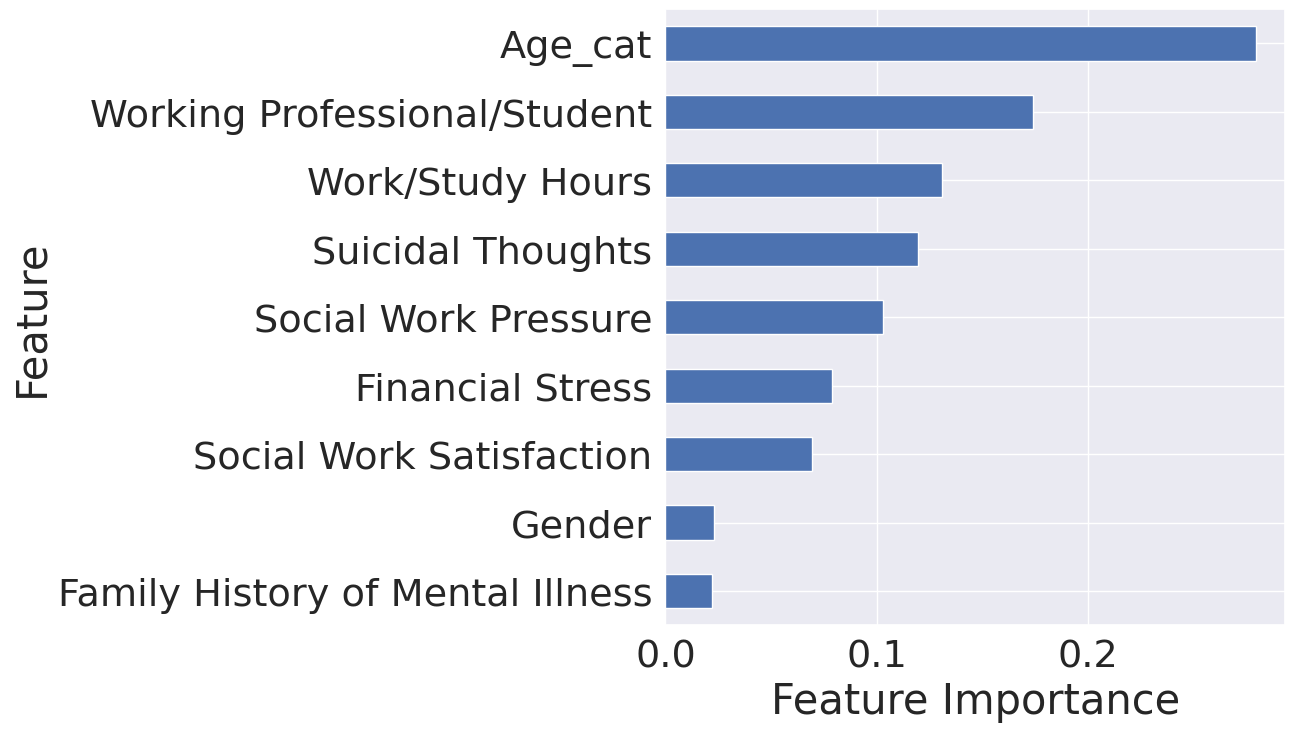

In [115]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

**Submissions**

In [116]:
submission = pd.read_csv('../input/playground-series-s4e11/sample_submission.csv')

In [117]:
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [118]:
prediction = model.predict(X_test)

In [119]:
submission['Depression'] = prediction

In [120]:
submission.to_csv('./prediction_mentalhealth_submission.csv', index = False)